In [53]:
import pandas
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [31]:
overhead_time_list = []
with open('data/test.txt') as f:
    for line in f:

        overhead_time_list.append(dt.strptime(line[:-8], '%Y-%m-%d %H:%M:%S'))

In [32]:
temp_df = pandas.DataFrame(overhead_time_list, columns=["overhead"])


In [33]:
temp_df

,overhead
0,2022-06-01 15:16:42
1,2022-06-01 16:08:12
2,2022-06-01 17:24:45
3,2022-06-01 18:22:13
4,2022-06-01 19:06:05
5,2022-06-01 20:14:59
6,2022-06-01 21:16:43
7,2022-06-01 22:18:38
8,2022-06-01 23:01:12


In [44]:
dt_list = pandas.date_range(start='2022-06-01', periods=24, freq='H')
dt_list = dt_list[15:]


In [45]:
dt_list

DatetimeIndex(['2022-06-01 15:00:00', '2022-06-01 16:00:00',
               '2022-06-01 17:00:00', '2022-06-01 18:00:00',
               '2022-06-01 19:00:00', '2022-06-01 20:00:00',
               '2022-06-01 21:00:00', '2022-06-01 22:00:00',
               '2022-06-01 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [46]:
temp_df['scheduled_time'] = dt_list

In [47]:
temp_df['delay'] = temp_df['overhead'] 

,overhead,scheduled_time
0,2022-06-01 15:16:42,2022-06-01 15:00:00
1,2022-06-01 16:08:12,2022-06-01 16:00:00
2,2022-06-01 17:24:45,2022-06-01 17:00:00
3,2022-06-01 18:22:13,2022-06-01 18:00:00
4,2022-06-01 19:06:05,2022-06-01 19:00:00
5,2022-06-01 20:14:59,2022-06-01 20:00:00
6,2022-06-01 21:16:43,2022-06-01 21:00:00
7,2022-06-01 22:18:38,2022-06-01 22:00:00
8,2022-06-01 23:01:12,2022-06-01 23:00:00


In [48]:
temp_df['overhead'][0] - temp_df['scheduled_time'][0]

Timedelta('0 days 00:16:42')

In [49]:
temp_df['delay'] = temp_df['overhead'] - temp_df['scheduled_time']

In [59]:
temp_df['delay_time'] = temp_df['delay'].dt.total_seconds()/60

In [ ]:
x1 = temp_df['scheduled_time']
y1 = temp_df['delay_time']
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(x1, y1, color='tomato',  linestyle='-', marker='o')
ax.set_xticks(temp_df['Matchweek'])



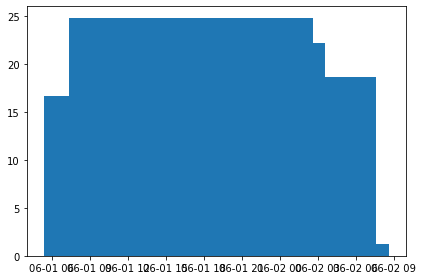

In [61]:
x1 = temp_df['scheduled_time']
y1 = temp_df['delay_time']
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(x1, y1)
plt.tight_layout()
plt.show()


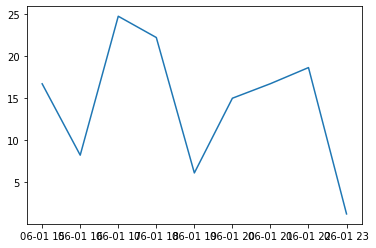

In [60]:
plt.plot(temp_df['scheduled_time'], temp_df['delay_time'])